In [3]:
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 11.5 MB 7.0 MB/s eta 0:00:01


In [19]:
# import pandas as pd
# import cudf
import pandas as pd
pd.options.plotting.backend = "plotly"
import plotly.express as px



In [94]:
df = pd.read_csv('HAM10000_metadata.csv')

In [95]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


### Age has NA values

In [96]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [97]:
df.loc[df['age'].isnull()]

,lesion_id,image_id,dx,dx_type,age,sex,localization
968,HAM_0001186,ISIC_0033391,bkl,consensus,NaN,unknown,unknown
969,HAM_0002660,ISIC_0033750,bkl,consensus,NaN,unknown,unknown
970,HAM_0000372,ISIC_0033685,bkl,consensus,NaN,unknown,unknown
971,HAM_0000948,ISIC_0033631,bkl,consensus,NaN,unknown,unknown
972,HAM_0000983,ISIC_0033490,bkl,consensus,NaN,unknown,unknown
973,HAM_0007281,ISIC_0034283,bkl,consensus,NaN,unknown,unknown
974,HAM_0001561,ISIC_0032740,bkl,consensus,NaN,unknown,unknown
975,HAM_0000825,ISIC_0034186,bkl,consensus,NaN,unknown,unknown
977,HAM_0006074,ISIC_0034252,bkl,consensus,NaN,unknown,unknown
978,HAM_0006074,ISIC_0033829,bkl,consensus,NaN,unknown,unknown


In [98]:
df['age'].fillna(-1).value_counts()

 45.0    1299
 50.0    1187
 55.0    1009
 40.0     985
 60.0     803
 70.0     756
 35.0     753
 65.0     731
 75.0     618
 30.0     464
 80.0     404
 85.0     290
 25.0     247
 20.0     169
 5.0       86
 15.0      77
-1.0       57
 10.0      41
 0.0       39
Name: age, dtype: int64

In [99]:
df[df['age'].isnull()]['sex'].value_counts()

unknown    47
male        6
female      4
Name: sex, dtype: int64

### `lesion_id` is not unique. I don't know how we identify it.

In [52]:
df['lesion_id'].value_counts()

HAM_0003789    6
HAM_0000835    6
HAM_0005263    6
HAM_0001863    6
HAM_0007427    5
              ..
HAM_0006000    1
HAM_0002762    1
HAM_0006894    1
HAM_0007132    1
HAM_0003347    1
Name: lesion_id, Length: 7470, dtype: int64

In [53]:
df[df['lesion_id']=='HAM_0003789']

,lesion_id,image_id,dx,dx_type,age,sex,localization
805,HAM_0003789,ISIC_0026016,bkl,confocal,55.0,female,face
806,HAM_0003789,ISIC_0029505,bkl,confocal,55.0,female,face
817,HAM_0003789,ISIC_0031277,bkl,confocal,55.0,female,face
819,HAM_0003789,ISIC_0031853,bkl,confocal,55.0,female,face
867,HAM_0003789,ISIC_0029464,bkl,confocal,55.0,female,face
869,HAM_0003789,ISIC_0024915,bkl,confocal,55.0,female,face


### Type of diagnosis

In [54]:
df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

### How the diagnosis was done

In [55]:
df['dx_type'].value_counts()

histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64

### Age distribution

In [56]:
df['age'].value_counts()

45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: age, dtype: int64

### Gender distribution

In [57]:
df['sex'].value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

In [71]:
df_sex_age_dist = df[['age','sex']].groupby(['age','sex']).size().reset_index().rename(columns={0:'count'})

In [72]:
# long_df = px.data.medals_long()

fig = px.bar(df_sex_age_dist, x="age", y="count", color='sex', title="Sex - Age Distribution")
fig.show()

In [73]:
df_sex_age_dist = df[['age','sex']].groupby(['sex','age']).size().reset_index().rename(columns={0:'count'})

In [74]:
fig = px.bar(df_sex_age_dist, x="sex", y="count", color='age', title="Sex - Age Distribution")
fig.show()

### Localization distribution

In [21]:
df['localization'].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

In [78]:
df_diag_sex_dist = df[['sex','dx']].groupby(['dx','sex']).size().reset_index().rename(columns={0:'count'})

In [80]:
fig = px.bar(df_diag_sex_dist, x="dx", y="count", color='sex', title="Diag - Sex Distribution")
fig.show()

In [81]:
df_diag_sex_dist = df[['age','dx']].groupby(['dx','age']).size().reset_index().rename(columns={0:'count'})
fig = px.bar(df_diag_sex_dist, x="dx", y="count", color='age', title="Diag - Age Distribution")
fig.show()

In [84]:
df_diag_sex_dist = df[['dx_type','dx']].groupby(['dx_type','dx']).size().reset_index().rename(columns={0:'count'})
fig = px.bar(df_diag_sex_dist, x="dx_type", y="count", color='dx', title="Diag - Diag type Distribution")
fig.show()

In [ ]:
df_diag_sex_dist = df[['dx_type','dx']].groupby(['dx_type','dx']).size().reset_index().rename(columns={0:'count'})
fig = px.bar(df_diag_sex_dist, x="dx_type", y="count", color='dx', title="Diag - Diag type Distribution")
fig.show()

In [104]:
# df.
df[['image_id','lesion_id']].groupby(['lesion_id']).size().reset_index().rename(columns={0:'count'})

,lesion_id,count
0,HAM_0000000,2
1,HAM_0000001,1
2,HAM_0000002,3
3,HAM_0000003,1
4,HAM_0000004,1
...,...,...
7465,HAM_0007624,1
7466,HAM_0007625,2
7467,HAM_0007626,1
7468,HAM_0007627,2


In [105]:
import cv2

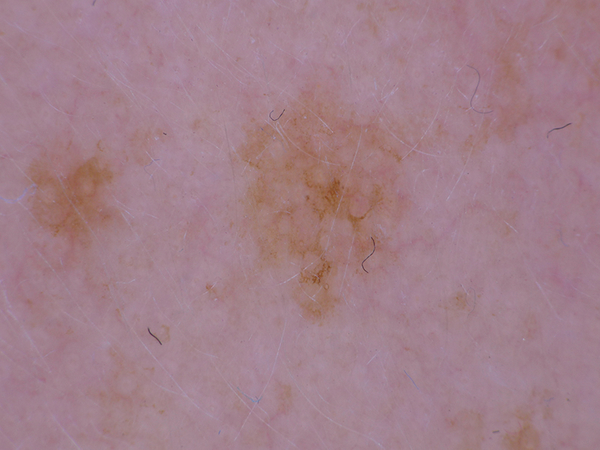

In [114]:
imgloc = "/data/mnist_skin/HAM10000_images_part_1/ISIC_0026016.jpg"
from IPython import display
display.Image("/data/mnist_skin/HAM10000_images_part_1/ISIC_0026016.jpg")

In [109]:
! ls

EDA_abajaj.ipynb	ham10000_images_part_1	hmnist_8_8_L.csv
HAM10000_images_part_1	ham10000_images_part_2	hmnist_8_8_RGB.csv
HAM10000_images_part_2	hmnist_28_28_L.csv	mnist_skin.zip
HAM10000_metadata.csv	hmnist_28_28_RGB.csv


In [110]:
df[df['lesion_id']=='HAM_0003789']

,lesion_id,image_id,dx,dx_type,age,sex,localization
805,HAM_0003789,ISIC_0026016,bkl,confocal,55.0,female,face
806,HAM_0003789,ISIC_0029505,bkl,confocal,55.0,female,face
817,HAM_0003789,ISIC_0031277,bkl,confocal,55.0,female,face
819,HAM_0003789,ISIC_0031853,bkl,confocal,55.0,female,face
867,HAM_0003789,ISIC_0029464,bkl,confocal,55.0,female,face
869,HAM_0003789,ISIC_0024915,bkl,confocal,55.0,female,face


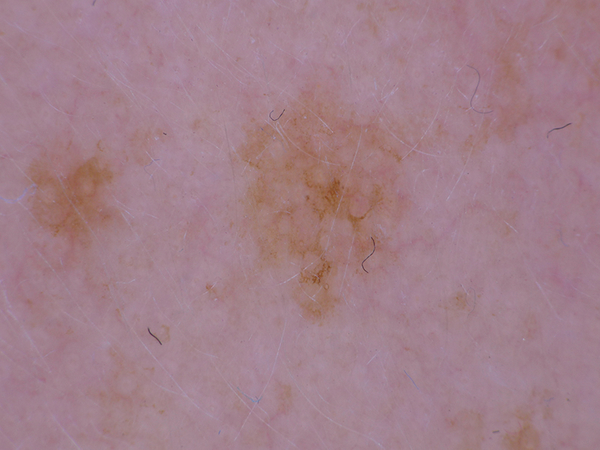

In [115]:
imgloc = "/data/mnist_skin/HAM10000_images_part_1/ISIC_0026016.jpg"
from IPython import display
display.Image("/data/mnist_skin/HAM10000_images_part_1/ISIC_0026016.jpg")

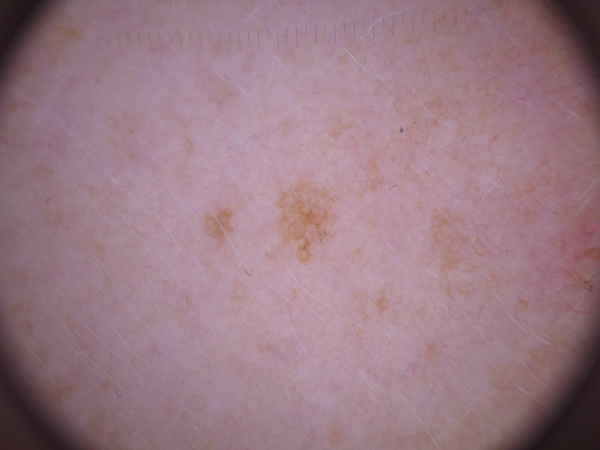

In [117]:
display.Image("/data/mnist_skin/HAM10000_images_part_2/ISIC_0029505.jpg")

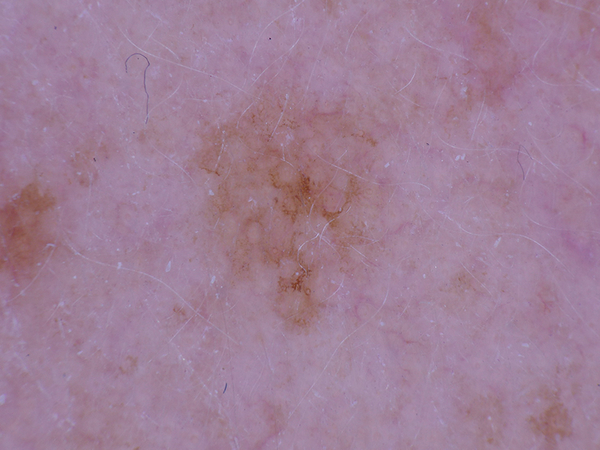

In [118]:
display.Image("/data/mnist_skin/HAM10000_images_part_2/ISIC_0031277.jpg")

In [119]:
! ls -lh

total 5.4G
-rw-r--r-- 1 root root 1.6M Nov 11 02:49 EDA_abajaj.ipynb
drwx------ 2 1000 1000 172K Nov  8 05:41 HAM10000_images_part_1
drwx------ 2 1000 1000 164K Nov  8 05:41 HAM10000_images_part_2
-rw------- 1 1000 1000 551K Oct  6  2019 HAM10000_metadata.csv
drwx------ 2 1000 1000 172K Nov  8 05:41 ham10000_images_part_1
drwx------ 2 1000 1000 164K Nov  8 05:41 ham10000_images_part_2
-rw------- 1 1000 1000  30M Oct  6  2019 hmnist_28_28_L.csv
-rw------- 1 1000 1000  88M Oct  6  2019 hmnist_28_28_RGB.csv
-rw------- 1 1000 1000 2.5M Oct  6  2019 hmnist_8_8_L.csv
-rw------- 1 1000 1000 7.2M Oct  6  2019 hmnist_8_8_RGB.csv
-rw------- 1 1000 1000 5.2G Oct  6  2019 mnist_skin.zip


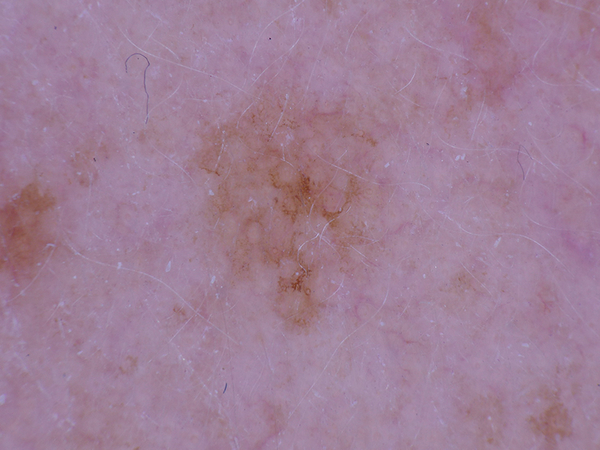

In [120]:
display.Image("/data/mnist_skin/ham10000_images_part_2/ISIC_0031277.jpg")

In [121]:
df = pd.read_csv('hmnist_28_28_RGB.csv')

In [134]:
df.iloc[:,2350:2353]

,pixel2350,pixel2351,label
0,154,177,2
1,14,27,2
2,104,117,2
3,12,15,2
4,78,92,2
...,...,...,...
10010,187,189,0
10011,4,1,0
10012,151,145,0
10013,162,172,0


In [133]:
len(df.columns)

2353

In [135]:
df['label'].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

- We output benign vs malignant 
- We can classify 7 of them and then establish a mapping.
- We can take an image and just use confocal as a `dx_type`
- We can ignore the `dx_type`
- We can ignore `localization` ? 
- Age & gender ?